<a href="https://colab.research.google.com/github/Anderson1292/Artificial_intelligence/blob/main/notebooks/Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Input,Dense
from keras.datasets import mnist

In [ ]:
(X_train,_),(y_train,_) = mnist.load_data()
X_train = X_train.astype('float32')/255
y_train = y_train.astype('float32')/255

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
y_train = y_train.reshape((len(y_train),np.prod(y_train.shape[1:])))

In [ ]:
autoencoder = Sequential()
autoencoder.add(Dense(32,activation='relu',input_dim=784))
autoencoder.add(Dense(784,activation='sigmoid'))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.fit(X_train,X_train,epochs=100,batch_size=256,validation_data=(y_train,y_train))

Epoch 1/100
235/235 [==============================] - 6s 20ms/step - loss: 0.2742 - accuracy: 0.0128 - val_loss: 0.1918 - val_accuracy: 0.0082
Epoch 2/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1729 - accuracy: 0.0106 - val_loss: 0.1547 - val_accuracy: 0.0104
Epoch 3/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1443 - accuracy: 0.0118 - val_loss: 0.1334 - val_accuracy: 0.0107
Epoch 4/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1284 - accuracy: 0.0113 - val_loss: 0.1212 - val_accuracy: 0.0100
Epoch 5/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1183 - accuracy: 0.0104 - val_loss: 0.1129 - val_accuracy: 0.0107
Epoch 6/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1111 - accuracy: 0.0105 - val_loss: 0.1069 - val_accuracy: 0.0109
Epoch 7/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1061 - accuracy: 0.0104 - val_loss: 0.1027 - val_accuracy:

In [ ]:
original_dimension = Input(shape=(784,))
layer_encoder = autoencoder.layers[0]
encoder = Model(original_dimension,layer_encoder(original_dimension))
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoded_images = encoder.predict(y_train)
decoded_images = autoencoder.predict(y_train)

313/313 [==============================] - 1s 2ms/step


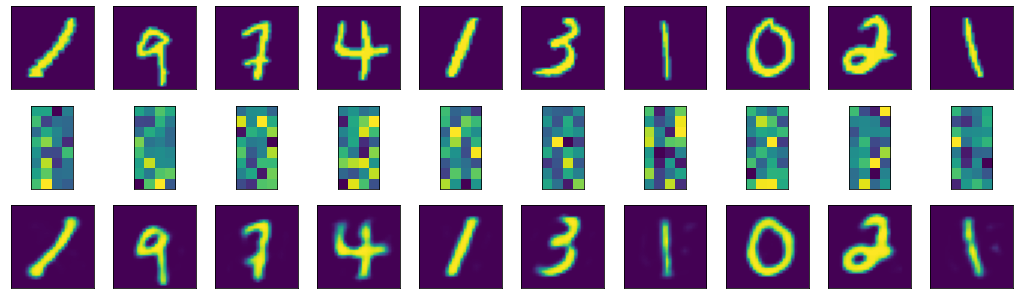

In [ ]:
number_images = 10
images_test = np.random.randint(y_train.shape[0],size=number_images)
plt.figure(figsize=(18,18))

for i, index in enumerate(images_test):
  #Original images
  axis = plt.subplot(10,10,i+1)
  plt.imshow(y_train[index].reshape(28,28))
  plt.xticks(())
  plt.yticks(())

  #Encoded Images
  axis = plt.subplot(10,10,i + 1 + number_images)
  plt.imshow(encoded_images[index].reshape(8,4))
  plt.xticks(())
  plt.yticks(())

  #Decoded Images
  axis = plt.subplot(10,10, i + 1 + number_images * 2)
  plt.imshow(decoded_images[index].reshape(28,28))
  plt.xticks(())
  plt.yticks(())